In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv('updated_cleaned_data.csv')

In [38]:
df_num_subset = df[['Price (€)', 'Construction year', 'Bedrooms',
       'Living area (m²)', 'Furnished', 'How many fireplaces?',
       'Terrace', 'Terrace surface (m²)', 'Garden', 'Garden surface (m²)',
       'Surface of the plot (m²)', 'Number of frontages', 'Swimming pool',
       'Elevator', 'Basement', 
       'Primary energy consumption (kWh/m²)', 'CO₂ emission (kg CO₂/m²)',
       'Kitchen type scale',
       'Building condition scale']]

In [39]:
# How many rows and columns?
num_rows, num_cols = df.shape

print(f'Number of Rows: {num_rows}')
print(f'Number of Columns: {num_cols}')

Number of Rows: 15146
Number of Columns: 30


/Users/saidkardic/Desktop/immoweb_project/challenge-data-analysis/venv/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.draw()
/Users/saidkardic/Desktop/immoweb_project/challenge-data-analysis/venv/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
/Users/saidkardic/Desktop/immoweb_project/challenge-data-analysis/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


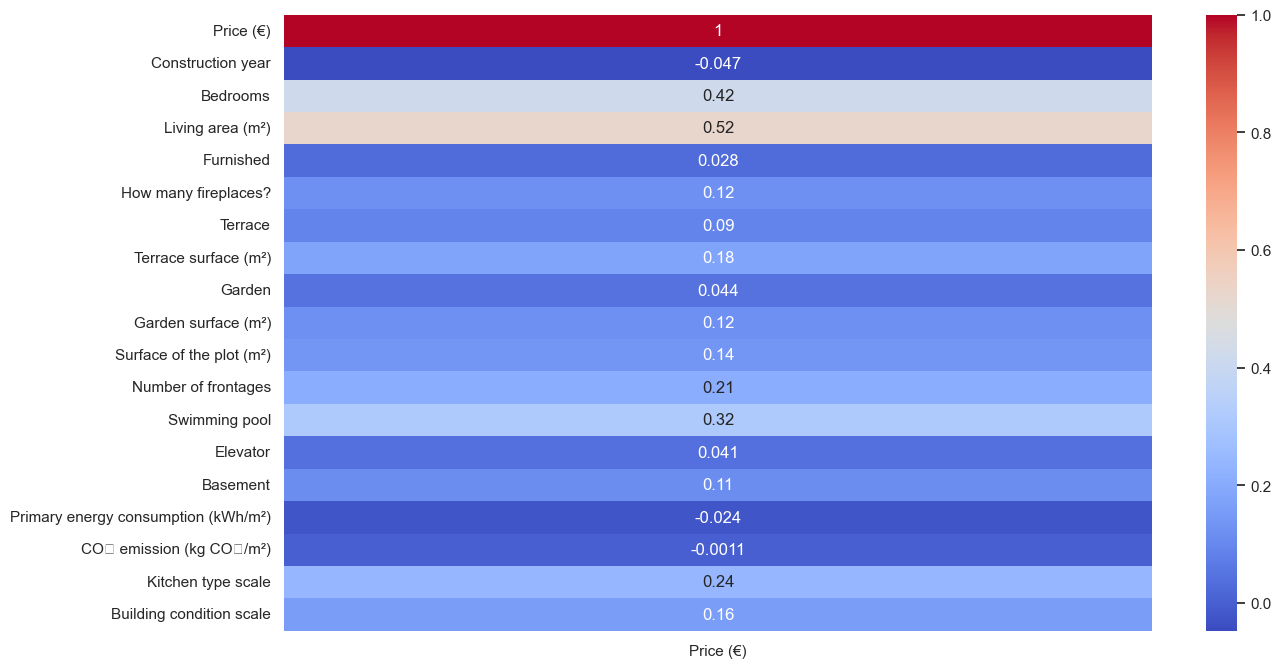

In [40]:
# What is the correlation between the variables and the price? (Why might that be?)
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df_num_subset.corr()
heatmap = sns.heatmap(corr[['Price (€)']], annot=True, cmap="coolwarm")

/Users/saidkardic/Desktop/immoweb_project/challenge-data-analysis/venv/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.draw()


<Axes: >

/Users/saidkardic/Desktop/immoweb_project/challenge-data-analysis/venv/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
/Users/saidkardic/Desktop/immoweb_project/challenge-data-analysis/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


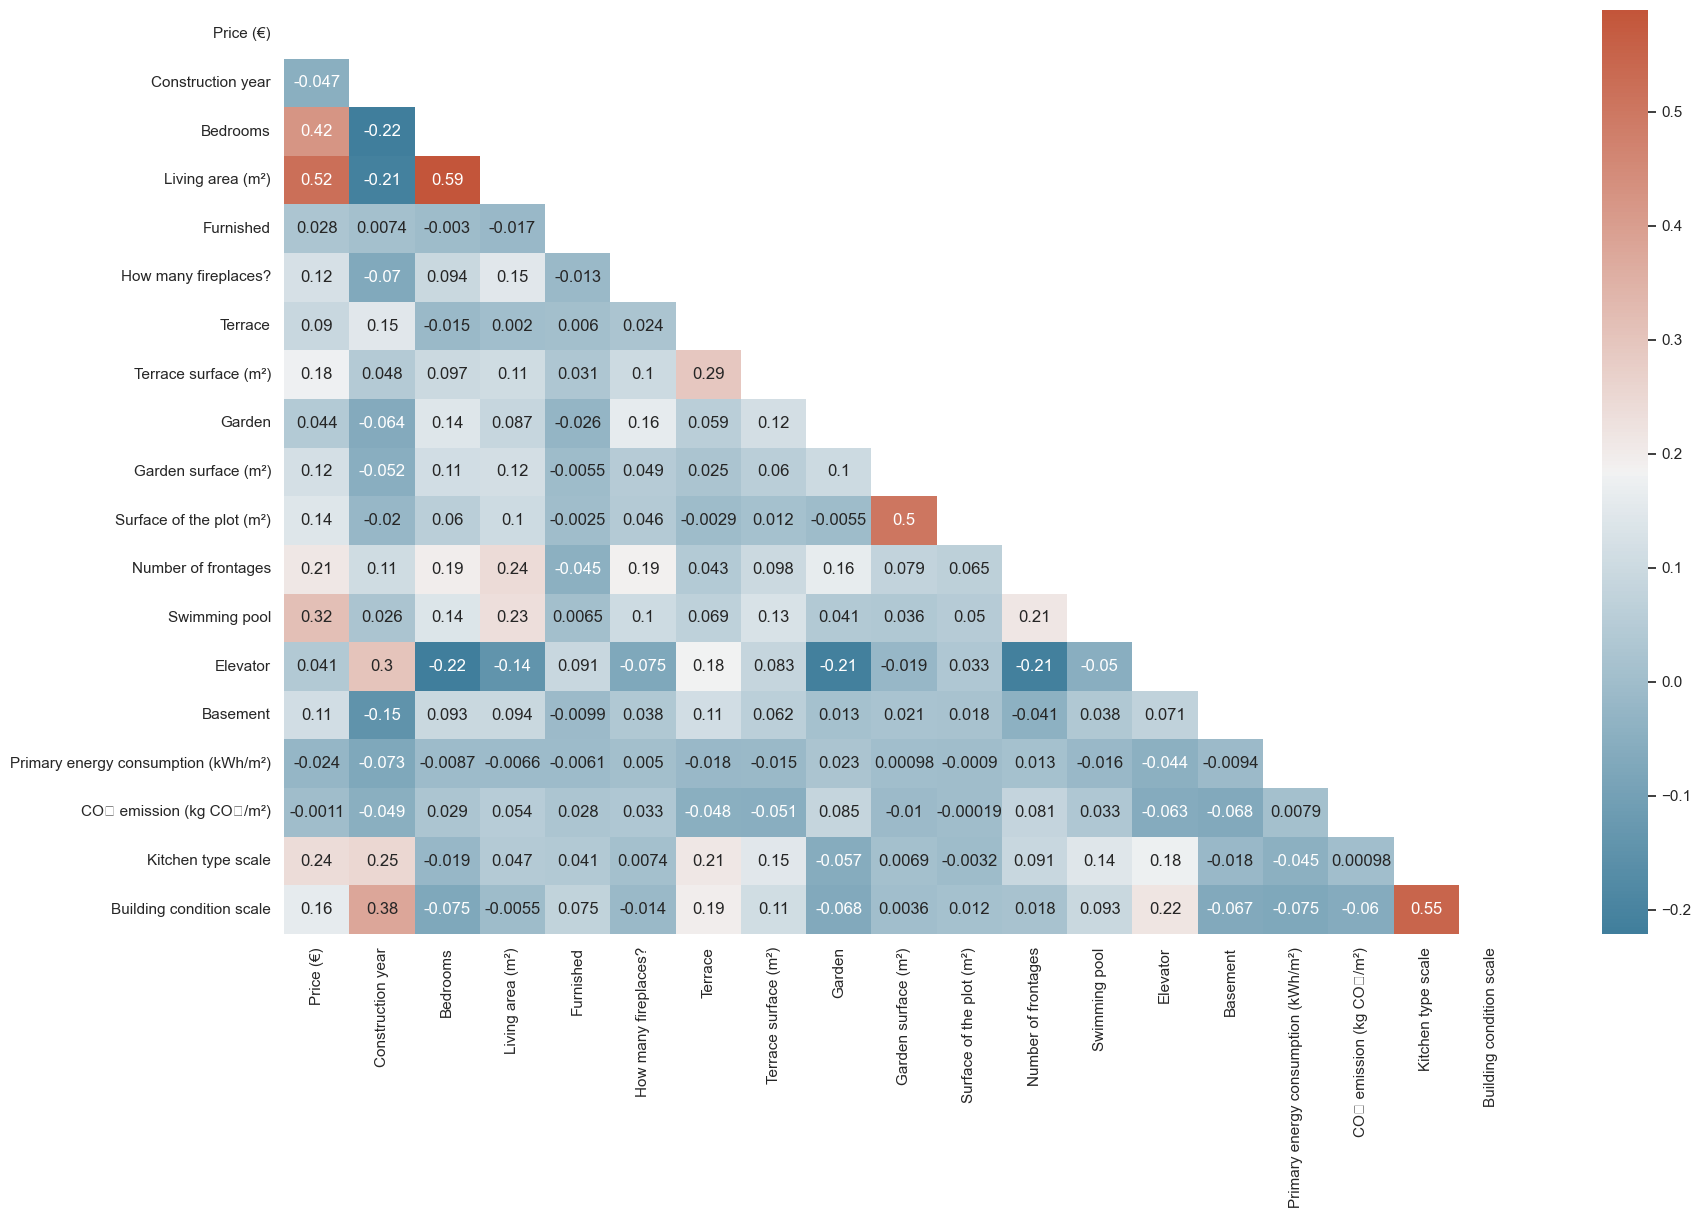

In [41]:
# How are variables correlated to each other? (Why?)

corr = df_num_subset.corr()
f, ax = plt.subplots(figsize=(20, 12))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

/Users/saidkardic/Desktop/immoweb_project/challenge-data-analysis/venv/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.draw()
/Users/saidkardic/Desktop/immoweb_project/challenge-data-analysis/venv/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  func(*args, **kwargs)
/Users/saidkardic/Desktop/immoweb_project/challenge-data-analysis/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


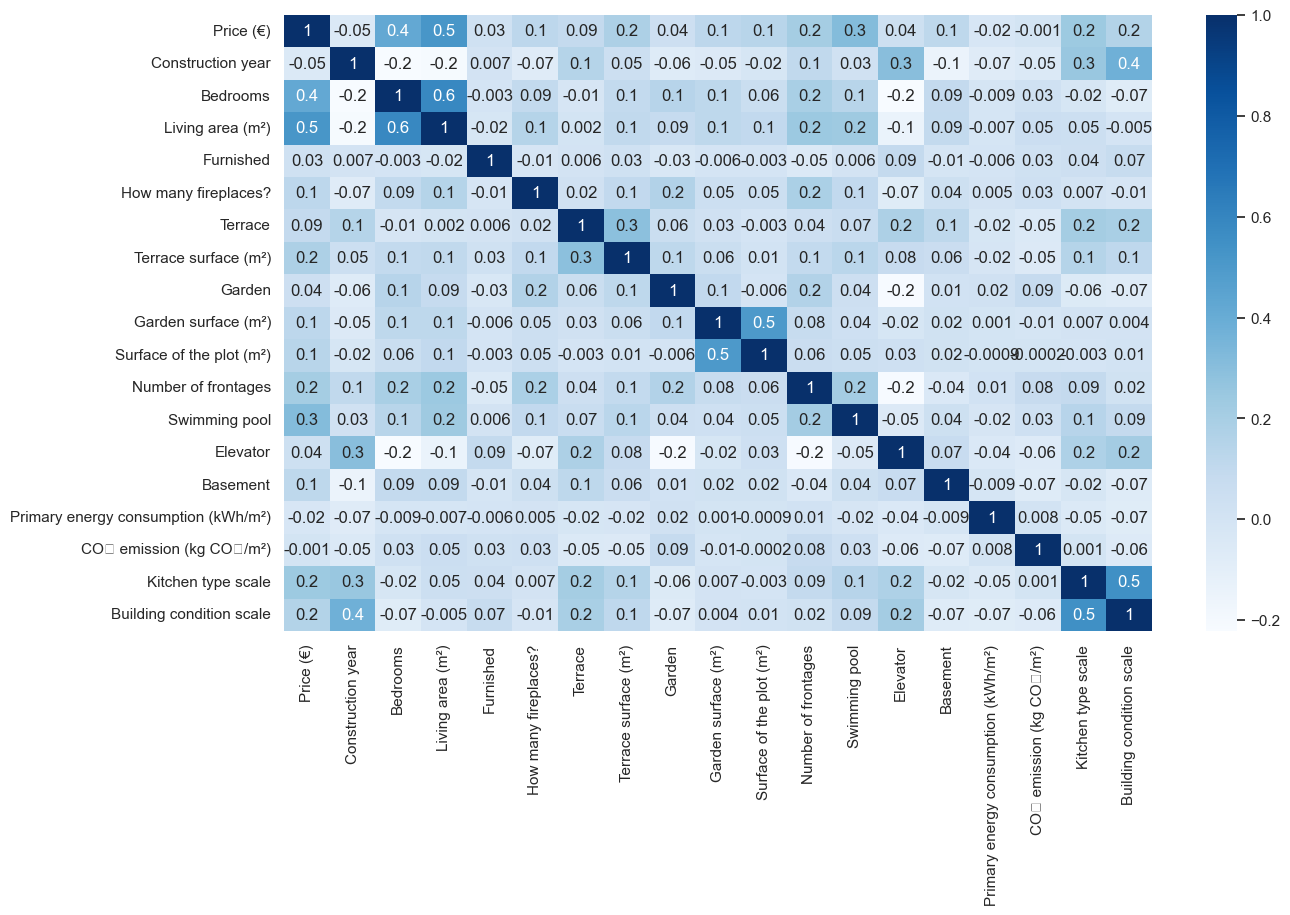

In [42]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df_num_subset.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [43]:
filt_b = (df['Zip code'] >= 1000) & (df['Zip code'] <= 1299)
filt_w = ((df['Zip code'] >= 1300) & (df['Zip code'] <= 1499)) | ((df['Zip code'] >=4000) & (df['Zip code'] <=7999))
filt_f = ((df['Zip code'] >= 1500) & (df['Zip code'] <= 3999)) | ((df['Zip code'] >=8000) & (df['Zip code'] <=9999))

In [48]:
df.groupby(df.loc[filt_f,'Zip code']).agg(Price_median=('Price (€)','median'),
                                          Price_mean=('Price (€)','mean'),
                                          Price_meter_square =('Price per m²','mean')).round().sort_values(by='Price_meter_square', ascending = False)

,Price_median,Price_mean,Price_meter_square
Zip code,,,
8300.0,1250000.0,1850511.0,10677.0
2030.0,982250.0,1018750.0,7773.0
8301.0,595000.0,968207.0,6282.0
3000.0,398000.0,548909.0,6205.0
1933.0,647000.0,872751.0,6173.0
...,...,...,...
8647.0,570000.0,537500.0,1224.0
3321.0,335000.0,521667.0,1085.0
3806.0,299000.0,1002667.0,976.0
